In [1]:
import cv2
import matplotlib.pyplot as plt
from itertools import product
import numpy as np

def show_image(image):
    # Convert BGR (OpenCV default) to RGB for display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(20, 10))
    plt.imshow(image_rgb)
    plt.show()

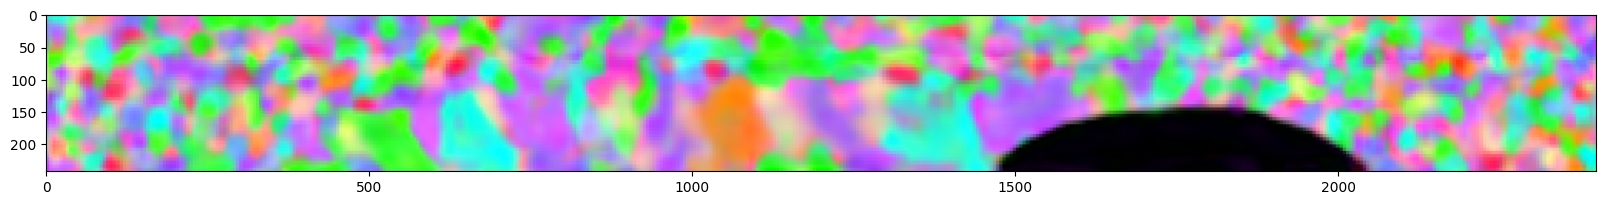

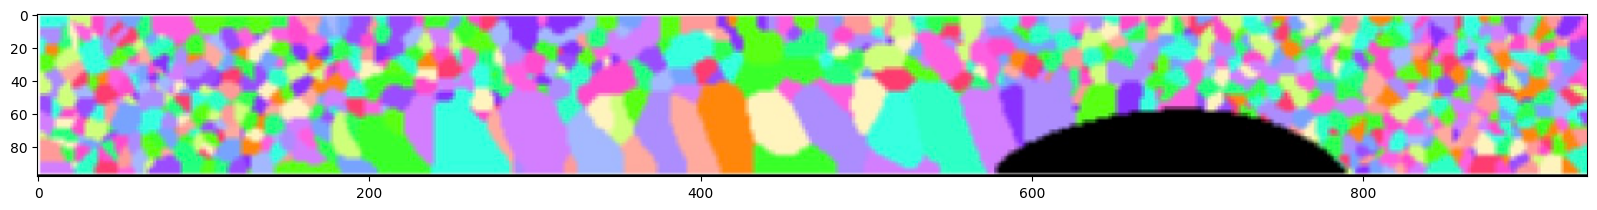

In [2]:
# Load image
prediction = cv2.imread('../data/predict_output.png')
target = cv2.imread('../data/target.png')

# Show image
show_image(prediction)
show_image(target)


In [3]:
def compute_sharpness(image, print_sharpness=False):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Variance of Laplacian measures sharpness
    # Higher value means sharper image
    sharpness =cv2.Laplacian(gray, cv2.CV_64F).var()
    if print_sharpness:
        print(f"Sharpness: {sharpness:.2f}")
    return sharpness

print("Prediction")
compute_sharpness(prediction, print_sharpness=True)

print("Target")
compute_sharpness(target, print_sharpness=True)

Prediction
Sharpness: 52.23
Target
Sharpness: 2528.64


np.float64(2528.635148220622)

Best parameters: {'d': 1, 'sigmaColor': np.int64(0), 'sigmaSpace': np.int64(0)} with sharpness: 52.23


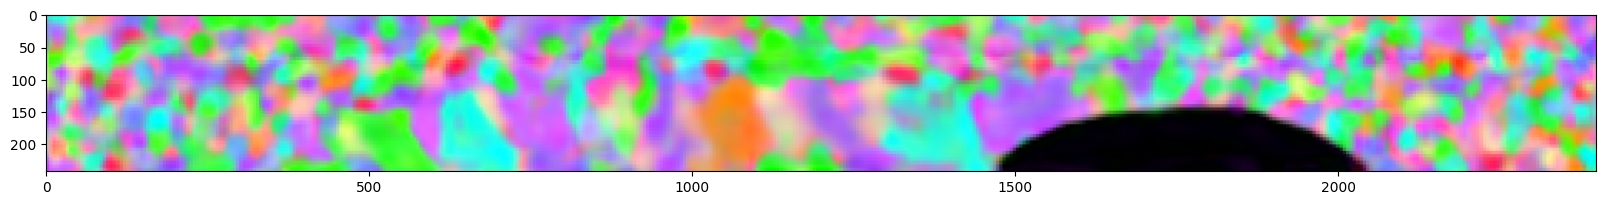

In [5]:
# Try several parameters sets for bilateralFilter
d = [1, 2, 3, 4]
sigmaColor = np.arange(0, 100, 10)
sigmaSpace = np.arange(0, 100, 10)

best_sharpness = -float('inf')
best_denoised = None
best_params = None

for d, sigmaColor, sigmaSpace in product(d, sigmaColor, sigmaSpace):
    denoised = cv2.bilateralFilter(prediction.copy(), d=d, sigmaColor=sigmaColor, sigmaSpace=sigmaSpace)
    sharpness = compute_sharpness(denoised, print_sharpness=False)
    if sharpness > best_sharpness:
        best_sharpness = sharpness
        best_denoised = denoised
        best_params = {'d': d, 'sigmaColor': sigmaColor, 'sigmaSpace': sigmaSpace}

print(f"Best parameters: {best_params} with sharpness: {best_sharpness:.2f}")
show_image(best_denoised)

Best parameters: {'h': np.float64(0.01), 'hColor': np.float64(1291.5496650148827), 'templateWindowSize': 1, 'searchWindowSize': 2} with sharpness: 89.67


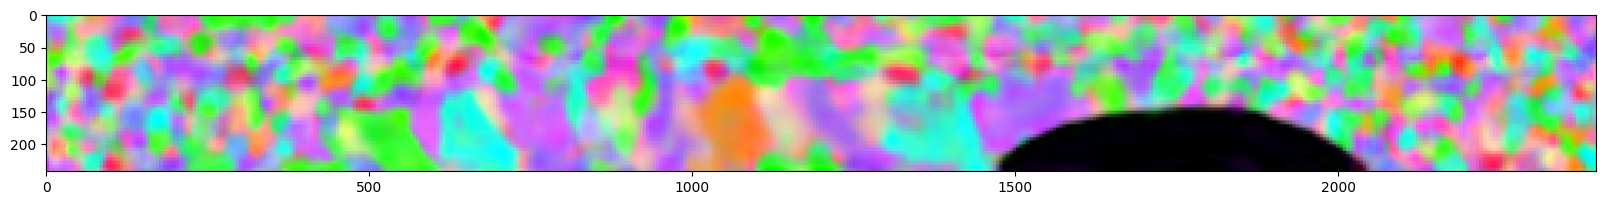

In [17]:
# Try several parameter sets for fastNlMeansDenoisingColored and compare sharpness

# Define parameter ranges
h_values = np.geomspace(0.01, 5, 10)
hColor_values = np.geomspace(1, 10000, 10)
templateWindowSize_values = [1, 2, 3, 5]
searchWindowSize_values = [1, 2, 7, 13]

best_sharpness = -float('inf')
best_denoised = None
best_params = None

# Iterate over all combinations
for h, hColor, templateWindowSize, searchWindowSize in product(
    h_values, hColor_values, templateWindowSize_values, searchWindowSize_values
):
    denoised = cv2.fastNlMeansDenoisingColored(
        prediction.copy(),
        None,
        h,
        hColor,
        templateWindowSize,
        searchWindowSize
    )
    # Compute sharpness
    sharpness = compute_sharpness(denoised, print_sharpness=False)

    if sharpness > best_sharpness:
        best_sharpness = sharpness
        best_denoised = denoised
        best_params = {'h': h, 'hColor': hColor, 'templateWindowSize': templateWindowSize, 'searchWindowSize': searchWindowSize}

print(f"Best parameters: {best_params} with sharpness: {best_sharpness:.2f}")
show_image(best_denoised)

Best parameters: {'sigma_s': 5, 'sigma_r': np.float64(0.01)} with sharpness: 52.23


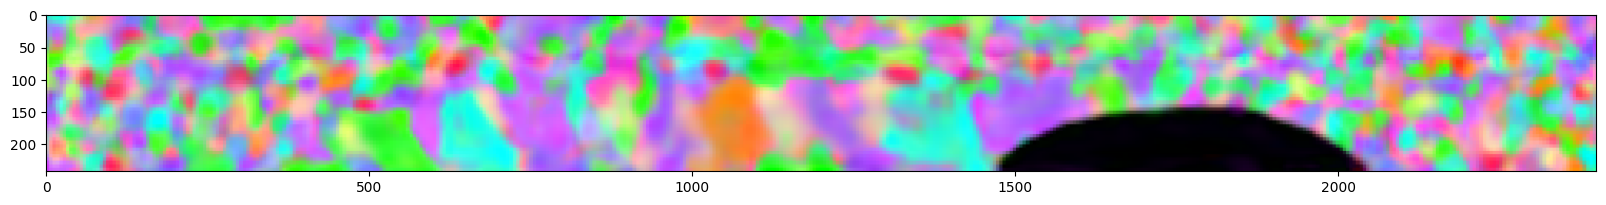

In [18]:
# Try different parameter sets for edgePreservingFilter

# Define parameter ranges
sigma_s_values = [1, 5, 10, 20, 30, 60]
sigma_r_values = np.geomspace(0.001, 1, 10)

best_sharpness = -float('inf')
best_denoised = None
best_params = None

for sigma_s, sigma_r in product(sigma_s_values, sigma_r_values):
    denoised = cv2.edgePreservingFilter(
        prediction.copy(),
        flags=1,
        sigma_s=sigma_s,
        sigma_r=sigma_r
    )
    # Compute sharpness
    sharpness = compute_sharpness(denoised, print_sharpness=False)

    if sharpness > best_sharpness:
        best_sharpness = sharpness
        best_denoised = denoised
        best_params = {'sigma_s': sigma_s, 'sigma_r': sigma_r}

print(f"Best parameters: {best_params} with sharpness: {best_sharpness:.2f}")
show_image(best_denoised)
